
### Business Understanding

Project Title: Analysis and Visualization of 2019 Sales Data

##### Client Overview:
The client has collected transactional sales data for the entire year of 2019 but has yet to leverage this data effectively. They aim to derive insights from the data to identify revenue opportunities, optimize operations, and drive more sales. This project involves analyzing and visualizing the sales data to answer key business questions related to sales performance, product trends, geographic distribution, and overall operational efficiency.

##### Project Goals:
The goal is to deliver a comprehensive business intelligence solution by analyzing sales data to provide the following insights:

- Understand total revenue generated in 2019.
- Identify seasonal patterns in sales.
- Determine best- and worst-selling products.
- Compare sales across different months and weeks.
- Identify cities with the highest number of product deliveries.
- Analyze revenue and quantities ordered across different product categories.
- Present any other significant insights or trends discovered during the analysis.


##### Client’s Key Concerns:

- How much revenue did we generate in 2019:This will help set a baseline for evaluating overall financial performance.

- Can we identify seasonality or trends in sales:To determine peak sales periods and identify patterns that could inform inventory and marketing strategies.

- Which products were our best and worst-sellers:Insights into product performance for improved inventory management and marketing focus.

- How do sales compare across months or weeks:To track sales performance trends across different time periods and understand fluctuations.

- Which cities receive the most deliveries:To inform geographic demand, logistics optimization, and potential market expansion strategies.

- How do product categories compare in terms of revenue and quantities sold:To assess which product categories contribute the most to revenue and where there might be room for growth.



Products with unit prices above $99.99 will be classified as high-level, while products below this threshold will be categorized as basic level. This will allow us to explore how high-level vs. basic-level products contribute to revenue and sales.

Exploration of Potential Anomalies:Investigate any unexpected patterns, anomalies, or outliers in the data.

##### BUSINESS UNDERSTANDING
###### Problem Statement
###### Project Goal
###### Stakeholders



##### Data Understanding

##### Data Understanding

- **Importations**

In [1]:
#Import the necessary python libraries
import pyodbc     
from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
import datetime
import calendar 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')

- **Loading the datasets**

In [2]:
# Import the January 2019 sales dataset
# Load data for January 2019
sales_jan_2019 = pd.read_csv("Sales_January_2019.csv")
sales_jan_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


In [3]:
# Import the February 2019 sales dataset
# Load data for February 2019
sales_feb_2019 = pd.read_csv(r"Sales_February_2019.csv")
sales_feb_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"
...,...,...,...,...,...,...
12031,162004,Apple Airpods Headphones,1,150,02/12/19 22:02,"227 Church St, San Francisco, CA 94016"
12032,162005,AAA Batteries (4-pack),2,2.99,02/04/19 20:44,"417 Jefferson St, Los Angeles, CA 90001"
12033,162006,USB-C Charging Cable,1,11.95,02/24/19 06:31,"498 8th St, Atlanta, GA 30301"
12034,162007,USB-C Charging Cable,1,11.95,02/24/19 19:09,"715 7th St, Dallas, TX 75001"


In [4]:
# Import the March 2019 sales dataset
# Load data for March 2019
sales_mar_2019 = pd.read_csv("Sales_March_2019.csv")
sales_mar_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016"
15222,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016"
15223,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001"
15224,176557,iPhone,1,700,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016"


In [5]:
# Import the April 2019 sales dataset
# Load data for April 2019
sales_apr_2019 = pd.read_csv("Sales_April_2019.csv")
sales_apr_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [6]:
# Import the May 2019 sales dataset
# Load data for May 2019
sales_may_2019 = pd.read_csv("Sales_May_2019.csv")
sales_may_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"
...,...,...,...,...,...,...
16630,209916,Bose SoundSport Headphones,1,99.99,05/08/19 19:15,"235 Center St, Seattle, WA 98101"
16631,209917,Wired Headphones,1,11.99,05/24/19 22:02,"926 9th St, San Francisco, CA 94016"
16632,209918,AAA Batteries (4-pack),2,2.99,05/24/19 17:44,"868 Hickory St, Boston, MA 02215"
16633,209919,USB-C Charging Cable,1,11.95,05/04/19 12:46,"204 Adams St, Seattle, WA 98101"


In [7]:
# Import the June 2019 sales dataset
# Load data for June 2019
sales_jun_2019 = pd.read_csv("Sales_June_2019.csv")
sales_jun_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [8]:
# # Merge All Data Sets For The First Half of 2019
# df = pd.concat([sales_jan_2019,sales_feb_2019,sales_mar_2019,sales_apr_2019,sales_may_2019,sales_jun_2019], axis = 0)
# df.reset_index(drop=True, inplace=True)
# df

In [9]:
# Load environment variables from .env file into a dictionary to access the first dataset
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"


In [10]:
# Use the connect method of the pyodbc library and pass in the connection string.
connection = pyodbc.connect(connection_string)


In [11]:

# write a query to view the tables  in the database 
db_query = '''SELECT * 
              FROM INFORMATION_SCHEMA.TABLES
              WHERE TABLE_TYPE = 'BASE TABLE' ''' 

data = pd.read_sql(db_query, connection)
data

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,dapDB,dbo,Sales_July_2019,BASE TABLE
1,dapDB,dbo,Sales_August_2019,BASE TABLE
2,dapDB,dbo,Sales_September_2019,BASE TABLE
3,dapDB,dbo,Sales_October_2019,BASE TABLE
4,dapDB,dbo,Sales_November_2019,BASE TABLE
5,dapDB,dbo,Sales_December_2019,BASE TABLE


In [12]:
# #Write queries to extract data from all the tables
# #write query to extract the july 2019
# query = "SELECT *  FROM dbo.Sales_July_2019"
# sales_jul_2019 = pd.read_sql(query, connection)

# #write query to extract the August 2019
# query = "SELECT *  FROM dbo.Sales_August_2019"
# sales_aug_2019 = pd.read_sql(query, connection)

# #write query to extract september 2019 data
# query = "SELECT *  FROM dbo.Sales_September_2019"
# sales_sep_2019 = pd.read_sql(query, connection)

# #write query to extract october 2019 data
# query = "SELECT *  FROM dbo.Sales_October_2019"
# sales_oct_2019 = pd.read_sql(query, connection)

# #write query to extract November 2019 data
# query = "SELECT *  FROM dbo.Sales_November_2019"
# sales_nov_2019 = pd.read_sql(query, connection)


# #write query to extract December 2019 data from table
# query = "SELECT *  FROM dbo.Sales_December_2019"
# sales_dec_2019 = pd.read_sql(query, connection)


In [13]:
#write query to extract the july 2019
query = ''' SELECT * 
            FROM Sales_July_2019 '''

sales_july_2019 = pd.read_sql(query, connection)
sales_july_2019.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

In [14]:
query = ''' SELECT * 
            FROM Sales_August_2019 '''

sales_aug_2019 = pd.read_sql(query, connection)
sales_aug_2019.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

In [15]:
query = ''' SELECT * 
            FROM Sales_September_2019 '''
sales_sept_2019 = pd.read_sql(query, connection)
sales_sept_2019.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

In [16]:
query = ''' SELECT * 
            FROM Sales_October_2019'''
sales_oct_2019 = pd.read_sql(query, connection)

sales_oct_2019.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each', 'Order_Date',
       'Purchase_Address'],
      dtype='object')

In [17]:
query = ''' SELECT * 
            FROM Sales_November_2019 '''

sales_nov_2019 = pd.read_sql(query, connection)
sales_nov_2019.head(3)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,278797.0,Wired Headphones,1.0,11.99,2021-11-19 09:54:00.0000000,"46 Park St, New York City, NY 10001"
1,278798.0,USB-C Charging Cable,2.0,11.95,2017-11-19 10:03:00.0000000,"962 Hickory St, Austin, TX 73301"
2,278799.0,Apple Airpods Headphones,1.0,150.00,2019-11-19 14:56:00.0000000,"464 Cherry St, Los Angeles, CA 90001"


In [18]:
query = ''' SELECT * 
            FROM Sales_December_2019 '''

sales_dec_2019 = pd.read_sql(query, connection)
sales_dec_2019.head(3)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,295665.0,Macbook Pro Laptop,1.0,1700.00,2030-12-19 00:01:00.0000000,"136 Church St, New York City, NY 10001"
1,295666.0,LG Washing Machine,1.0,600.00,2029-12-19 07:03:00.0000000,"562 2nd St, New York City, NY 10001"
2,295667.0,USB-C Charging Cable,1.0,11.95,2012-12-19 18:21:00.0000000,"277 Main St, New York City, NY 10001"


##### **Exploratory Data Analysis(EDA) and Data Cleaning**
- **Data Quality Assessment & Exploring data**

- Our datasets have different column names for the first half of 2019 and second half. We will rename the column names for uniformity before merging for further cleaning, exploration and analysis


In [19]:
#rename column names for each dataframe for uniformity before merging

sales_jan_2019.rename(columns = {'Order ID':'Order_ID','Quantity Ordered':'Quantity_Ordered','Price Each': 'Price_Each','Order Date':'Order_Date','Purchase Address':'Purchase_Address'},inplace = True)
sales_feb_2019.rename(columns = {'Order ID':'Order_ID','Quantity Ordered':'Quantity_Ordered','Price Each': 'Price_Each','Order Date':'Order_Date','Purchase Address':'Purchase_Address'},inplace = True)
sales_mar_2019.rename(columns = {'Order ID':'Order_ID','Quantity Ordered':'Quantity_Ordered','Price Each': 'Price_Each','Order Date':'Order_Date','Purchase Address':'Purchase_Address'},inplace = True)
sales_apr_2019.rename(columns = {'Order ID':'Order_ID','Quantity Ordered':'Quantity_Ordered','Price Each': 'Price_Each','Order Date':'Order_Date','Purchase Address':'Purchase_Address'},inplace = True)
sales_may_2019.rename(columns = {'Order ID':'Order_ID','Quantity Ordered':'Quantity_Ordered','Price Each': 'Price_Each','Order Date':'Order_Date','Purchase Address':'Purchase_Address'},inplace = True)
sales_jun_2019.rename(columns = {'Order ID':'Order_ID','Quantity Ordered':'Quantity_Ordered','Price Each': 'Price_Each','Order Date':'Order_Date','Purchase Address':'Purchase_Address'},inplace = True)

#preview the data
sales_jan_2019.head(2)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"


- **Merging the Datasets**

In [20]:
# Merge All Data Sets For Second Half of 2019
df = pd.concat([sales_jan_2019,sales_feb_2019,sales_mar_2019,sales_apr_2019,sales_may_2019,sales_jun_2019,sales_july_2019,sales_aug_2019,sales_sept_2019,sales_oct_2019,sales_nov_2019,sales_dec_2019], axis = 0)
df.reset_index(drop=True, inplace=True)
df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666.0,Lightning Charging Cable,1.0,14.95,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016"
186846,319667.0,AA Batteries (4-pack),2.0,3.84,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001"
186847,319668.0,Vareebadd Phone,1.0,400.0,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101"
186848,319669.0,Wired Headphones,1.0,11.99,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001"


In [21]:
#Rename the Price_Each to Unit_price and Order_Date to Date
df.rename(columns = {'Price_Each':'Unit_Price','Order_Date':'Date'},inplace= True)

In [22]:
## a quick overview of the datatypes 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          186110 non-null  object
 1   Product           186305 non-null  object
 2   Quantity_Ordered  186110 non-null  object
 3   Unit_Price        186110 non-null  object
 4   Date              186110 non-null  object
 5   Purchase_Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


**Observations**
- This reveals that most columns are not in the right datatype and needs to be converted.we will rename the Order date and convert to the right datatype(datetime)


In [23]:
# #check for duplicates rows and total duplicates
print(df[df.duplicated()])

print(f' Total number of duplicates is:{df.duplicated().sum()}')

        Order_ID                Product  Quantity_Ordered  Unit_Price  \
678          NaN                    NaN               NaN         NaN   
797          NaN                    NaN               NaN         NaN   
875       142071  AA Batteries (4-pack)                 1        3.84   
876          NaN                    NaN               NaN         NaN   
1102    Order ID                Product  Quantity Ordered  Price Each   
...          ...                    ...               ...         ...   
185481       NaN                Product               NaN         NaN   
185729       NaN                   None               NaN         NaN   
185925       NaN                Product               NaN         NaN   
185955       NaN                Product               NaN         NaN   
186463       NaN                   None               NaN         NaN   

                  Date              Purchase_Address  
678                NaN                           NaN  
797          

In [24]:
#drop the duplicates
df.drop_duplicates(keep='first',inplace =True)

#reset the index
df.reset_index(inplace=True)

In [25]:
# check the unique values in the dataframe
columns = df.columns
for column in columns:
    print(f'{column}')
    print(f' There are {df[column].unique().size} unique values')
    print(f'{df[column].unique()}')
    print('=' * 50)

index
 There are 185689 unique values
[     0      1      2 ... 186847 186848 186849]
Order_ID
 There are 178439 unique values
['141234' '141235' '141236' ... 319668.0 319669.0 319670.0]
Product
 There are 21 unique values
['iPhone' 'Lightning Charging Cable' 'Wired Headphones' '27in FHD Monitor'
 'AAA Batteries (4-pack)' '27in 4K Gaming Monitor' 'USB-C Charging Cable'
 'Bose SoundSport Headphones' 'Apple Airpods Headphones'
 'Macbook Pro Laptop' 'Flatscreen TV' 'Vareebadd Phone'
 'AA Batteries (4-pack)' 'Google Phone' '20in Monitor'
 '34in Ultrawide Monitor' 'ThinkPad Laptop' 'LG Dryer'
 'LG Washing Machine' nan 'Product']
Quantity_Ordered
 There are 19 unique values
['1' '2' '3' '5' '4' nan '7' 'Quantity Ordered' '6' '9' 1.0 5.0 2.0 3.0
 4.0 6.0 7.0 8.0 9.0]
Unit_Price
 There are 41 unique values
['700' '14.95' '11.99' '149.99' '2.99' '389.99' '11.95' '99.99' '150'
 '1700' '300' '400' '3.84' '600' '109.99' '379.99' '999.99' '600.0' nan
 'Price Each' '700.0' '150.0' '300.0' '1700.0' 1

- we have some strings in the columns, header names and nan. We will convert the columns names to lower case, remove the strings and convert to appropraite datatype

In [26]:
# Changing the Column Headers to lower case and remove ' 
df.columns = df.columns.str.lower()

# Strip quotes from all columns
df = df.applymap(lambda x: x.strip('"') if isinstance(x, str) else x)





In [27]:

#locate the row where the unit_price is Price Each and drop
df.loc[df['unit_price'] == 'Price Each']

# Drop row with index 1069
df = df.drop(index=1069)

# reset the index after the deletion (optional)
df = df.reset_index(drop=True)

In [28]:

#convert the Quantity_ordered and Unit_price to numeric
df['unit_price'] = pd. to_numeric(df['unit_price'])
df['quantity_ordered'] = pd.to_numeric(df['quantity_ordered'])

In [29]:
#convert the date column to datetime
df['date'] = pd.to_datetime(df['date'], errors ='coerce')

In [30]:
# Step 1: Split the 'full_address' column into street, city, state, and zip_code
df[['street_address', 'city', 'state_zip']] = df['purchase_address'].str.split(',', n=2, expand=True)


In [31]:
# Step 1: Remove leading whitespaces using str.lstrip() to clean up the data
df['state_zip_cleaned'] = df['state_zip'].str.lstrip()

# Step 2: Split the 'state_zip_cleaned' column into 'state' and 'zip_code'
df[['state', 'zip_code']] = df['state_zip_cleaned'].str.split(r'\s+', n=1, expand=True)

# Step 3: Drop the intermediate 'state_zip_cleaned' column and state_zip (optional)
df = df.drop(columns=['state_zip_cleaned','state_zip'])

# Display the resulting DataFrame
df

,index,order_id,product,quantity_ordered,unit_price,date,purchase_address,street_address,city,state,zip_code
0,0,141234,iPhone,1.0,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",944 Walnut St,Boston,MA,02215
1,1,141235,Lightning Charging Cable,1.0,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",185 Maple St,Portland,OR,97035
2,2,141236,Wired Headphones,2.0,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",538 Adams St,San Francisco,CA,94016
3,3,141237,27in FHD Monitor,1.0,149.990000,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",738 10th St,Los Angeles,CA,90001
4,4,141238,Wired Headphones,1.0,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",387 10th St,Austin,TX,73301
...,...,...,...,...,...,...,...,...,...,...,...
185683,186845,319666.0,Lightning Charging Cable,1.0,14.950000,2011-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016",14 Madison St,San Francisco,CA,94016
185684,186846,319667.0,AA Batteries (4-pack),2.0,3.840000,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001",549 Willow St,Los Angeles,CA,90001
185685,186847,319668.0,Vareebadd Phone,1.0,400.000000,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101",273 Wilson St,Seattle,WA,98101
185686,186848,319669.0,Wired Headphones,1.0,11.990000,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001",778 River St,Dallas,TX,75001


- the state column is abbreviated, we will map the abbreviations to their full names


In [32]:
#define mappings
state_abbreviation_mapping = {"CA":"California",
                              "NY":"New York",
                              "TX":"Texas",
                              "MA":"Massachusetts",
                              "GA":"Georgia",
                              "WA":"Washington",
                              "OR":"Oregon",
                              "ME":"Maine"}

In [33]:
#map the abbreviations to the state
df['states'] = df['state'].map(state_abbreviation_mapping)

#drop the state column with abbreviations
df.drop(columns=['state'],inplace = True)

#view the dataframe
df

,index,order_id,product,quantity_ordered,unit_price,date,purchase_address,street_address,city,zip_code,states
0,0,141234,iPhone,1.0,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",944 Walnut St,Boston,02215,Massachusetts
1,1,141235,Lightning Charging Cable,1.0,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",185 Maple St,Portland,97035,Oregon
2,2,141236,Wired Headphones,2.0,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",538 Adams St,San Francisco,94016,California
3,3,141237,27in FHD Monitor,1.0,149.990000,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",738 10th St,Los Angeles,90001,California
4,4,141238,Wired Headphones,1.0,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",387 10th St,Austin,73301,Texas
...,...,...,...,...,...,...,...,...,...,...,...
185683,186845,319666.0,Lightning Charging Cable,1.0,14.950000,2011-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016",14 Madison St,San Francisco,94016,California
185684,186846,319667.0,AA Batteries (4-pack),2.0,3.840000,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001",549 Willow St,Los Angeles,90001,California
185685,186847,319668.0,Vareebadd Phone,1.0,400.000000,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101",273 Wilson St,Seattle,98101,Washington
185686,186848,319669.0,Wired Headphones,1.0,11.990000,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001",778 River St,Dallas,75001,Texas


In [34]:
df['product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine', nan, 'Product'], dtype=object)

In [35]:
# Categorization dictionary
category_dict = {
    'Phones': ['iPhone', 'Vareebadd Phone', 'Google Phone'],
    'Cables/Charging Accessories': ['Lightning Charging Cable', 'USB-C Charging Cable'],
    'Headphones': ['Wired Headphones', 'Bose SoundSport Headphones', 'Apple Airpods Headphones'],
    'Monitors': ['27in FHD Monitor', '27in 4K Gaming Monitor', '20in Monitor', '34in Ultrawide Monitor'],
    'Batteries': ['AAA Batteries (4-pack)', 'AA Batteries (4-pack)'],
    'Laptops': ['Macbook Pro Laptop', 'ThinkPad Laptop'],
    'Home Appliances': ['LG Dryer', 'LG Washing Machine'],
    'TVs': ['Flatscreen TV']
}

# Function to categorize product
def categorize_product(product):
    for category, items in category_dict.items():
        if product in items:
            return category
    return 'Other'

# Apply categorization to each product
df['product_category'] = df['product'].apply(categorize_product)

df

,index,order_id,product,quantity_ordered,unit_price,date,purchase_address,street_address,city,zip_code,states,product_category
0,0,141234,iPhone,1.0,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",944 Walnut St,Boston,02215,Massachusetts,Phones
1,1,141235,Lightning Charging Cable,1.0,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",185 Maple St,Portland,97035,Oregon,Cables/Charging Accessories
2,2,141236,Wired Headphones,2.0,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",538 Adams St,San Francisco,94016,California,Headphones
3,3,141237,27in FHD Monitor,1.0,149.990000,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",738 10th St,Los Angeles,90001,California,Monitors
4,4,141238,Wired Headphones,1.0,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",387 10th St,Austin,73301,Texas,Headphones
...,...,...,...,...,...,...,...,...,...,...,...,...
185683,186845,319666.0,Lightning Charging Cable,1.0,14.950000,2011-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016",14 Madison St,San Francisco,94016,California,Cables/Charging Accessories
185684,186846,319667.0,AA Batteries (4-pack),2.0,3.840000,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001",549 Willow St,Los Angeles,90001,California,Batteries
185685,186847,319668.0,Vareebadd Phone,1.0,400.000000,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101",273 Wilson St,Seattle,98101,Washington,Phones
185686,186848,319669.0,Wired Headphones,1.0,11.990000,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001",778 River St,Dallas,75001,Texas,Headphones


- Missing Values

In [36]:
#check for missing values
df.isnull().sum()

index               0
order_id            2
product             1
quantity_ordered    2
unit_price          2
date                2
purchase_address    1
street_address      1
city                2
zip_code            2
states              2
product_category    0
dtype: int64

In [37]:
# Get all the indexes where there are NaN or NaT values in any column
na_indexes = df[df.isna().any(axis=1)].index

print(na_indexes)


Index([664, 85884], dtype='int64')


In [38]:
df.loc[[664,85884]]

,index,order_id,product,quantity_ordered,unit_price,date,purchase_address,street_address,city,zip_code,states,product_category
664,664,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,Other
85884,86400,NaN,Product,NaN,NaN,NaT,Purchase Address,Purchase Address,None,None,NaN,Other


In [39]:
#drop the missing values
df= df.dropna()

- Descriptive statistics

In [40]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
index,185686.0,93413.215897,0.0,46702.25,93413.5,140126.5,186849.0,53939.971987
quantity_ordered,185686.0,1.124544,1.0,1.0,1.0,1.0,9.0,0.443069
unit_price,185686.0,184.519255,2.99,11.95,14.95,150.0,1700.0,332.843838
date,185686,2017-11-12 13:09:00.319571456,2001-01-20 00:10:00,2015-08-19 19:22:15,2019-03-26 14:19:30,2019-06-20 17:08:45,2031-12-19 23:53:00,NaN


**Insights:**
- The quantity_ordered column is positively skewed because the mean (1.1245) is slightly greater than the median (1.0), and the maximum value (9.0) is much higher than the median, indicating a tail on the right and uneven distribution of data.The vast majority of values are 1, the distribution has a sharp peak, which indicates leptokurtic behavior (high kurtosis) — most orders are for 1 item, with few larger orders.
- The unit_price is highly positively skewed because the mean is significantly greater than the median, and there is a large difference between the maximum price (1700.0) and the median. This shows that most items are low-priced, with a few very expensive ones.The high standard deviation (332.84) and the presence of extreme values suggest that the distribution has high kurtosis (leptokurtic), with many low-priced items and a small number of very high-priced ones. This leads to a more peaked distribution with extreme outliers (i.e., expensive products).
- The date column has data centered around 2015-2019. Since we are only interested in 2019 sales, we will drop columns without 2019.

In [41]:
# Filter the DataFrame to only keep rows where 'year' is 2019
df1 = df[df['date'].dt.year == 2019]

#drop the purchase_address column
df1.drop(columns=['purchase_address','index'], inplace = True)


In [42]:
#check the info of the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88478 entries, 0 to 185653
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          88478 non-null  object        
 1   product           88478 non-null  object        
 2   quantity_ordered  88478 non-null  float64       
 3   unit_price        88478 non-null  float64       
 4   date              88478 non-null  datetime64[ns]
 5   street_address    88478 non-null  object        
 6   city              88478 non-null  object        
 7   zip_code          88478 non-null  object        
 8   states            88478 non-null  object        
 9   product_category  88478 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 7.4+ MB


In [43]:
#convert the order id to integer
df1['order_id'] = df1['order_id'].astype(int)
df1['zip_code']= df1['zip_code'].astype(int)



#convert the object columns to category to optimize memory usage
# List of columns to convert to category
category_columns = ['product', 'states', 'product_category','city', 'street_address']

#define a function to convert them to category
def convert_to_category(df1, category_columns):
    for col in category_columns:
        df1[col] = df1[col].astype('category')
    return df1

# Convert the columns to category using the function
df1 = convert_to_category(df1, category_columns)


# Check the updated data types
print(df1.info())


<class 'pandas.core.frame.DataFrame'>
Index: 88478 entries, 0 to 185653
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          88478 non-null  int64         
 1   product           88478 non-null  category      
 2   quantity_ordered  88478 non-null  float64       
 3   unit_price        88478 non-null  float64       
 4   date              88478 non-null  datetime64[ns]
 5   street_address    88478 non-null  category      
 6   city              88478 non-null  category      
 7   zip_code          88478 non-null  int64         
 8   states            88478 non-null  category      
 9   product_category  88478 non-null  category      
dtypes: category(5), datetime64[ns](1), float64(2), int64(2)
memory usage: 6.0 MB
None


In [44]:
df1.shape

(88478, 10)

##### Feature Engineering


In [45]:
#set the date as index

df1.set_index('date', inplace=True)

In [46]:

# Extract year from the date column
df1['year'] = df1.index.year

# Extract month name from the date column
df1['month_name'] = df1.index.month_name().astype('category')

# Extract day of the week from the date column (0=Monday, 6=Sunday)
df1['day_name'] = df1.index.day_name().astype('category')

# Create thee new column sales and round up to 2 decimal places
df1['sales'] = (df1['quantity_ordered'] * df1['unit_price']).round(2)


df1.head(3)

,order_id,product,quantity_ordered,unit_price,street_address,city,zip_code,states,product_category,year,month_name,day_name,sales
date,,,,,,,,,,,,,
2019-01-22 21:25:00,141234,iPhone,1.0,700.00,944 Walnut St,Boston,2215,Massachusetts,Phones,2019,January,Tuesday,700.00
2019-01-28 14:15:00,141235,Lightning Charging Cable,1.0,14.95,185 Maple St,Portland,97035,Oregon,Cables/Charging Accessories,2019,January,Monday,14.95
2019-01-17 13:33:00,141236,Wired Headphones,2.0,11.99,538 Adams St,San Francisco,94016,California,Headphones,2019,January,Thursday,23.98


In [47]:

#save cleaned data to csv file
df1.to_csv('getinnotized_sales_data.csv')

In [48]:
df1.head(3)

,order_id,product,quantity_ordered,unit_price,street_address,city,zip_code,states,product_category,year,month_name,day_name,sales
date,,,,,,,,,,,,,
2019-01-22 21:25:00,141234,iPhone,1.0,700.00,944 Walnut St,Boston,2215,Massachusetts,Phones,2019,January,Tuesday,700.00
2019-01-28 14:15:00,141235,Lightning Charging Cable,1.0,14.95,185 Maple St,Portland,97035,Oregon,Cables/Charging Accessories,2019,January,Monday,14.95
2019-01-17 13:33:00,141236,Wired Headphones,2.0,11.99,538 Adams St,San Francisco,94016,California,Headphones,2019,January,Thursday,23.98


##### Univariate Analysis

- **Numerical Variables Distribution**

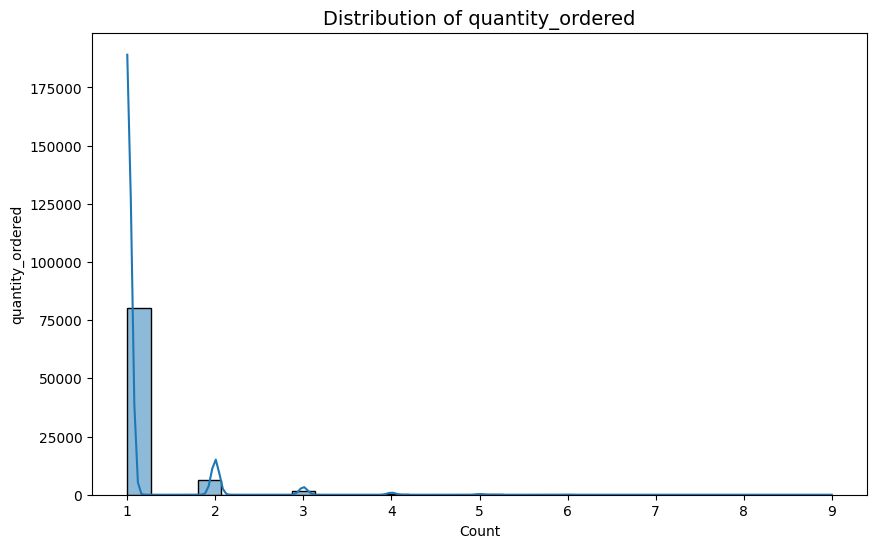

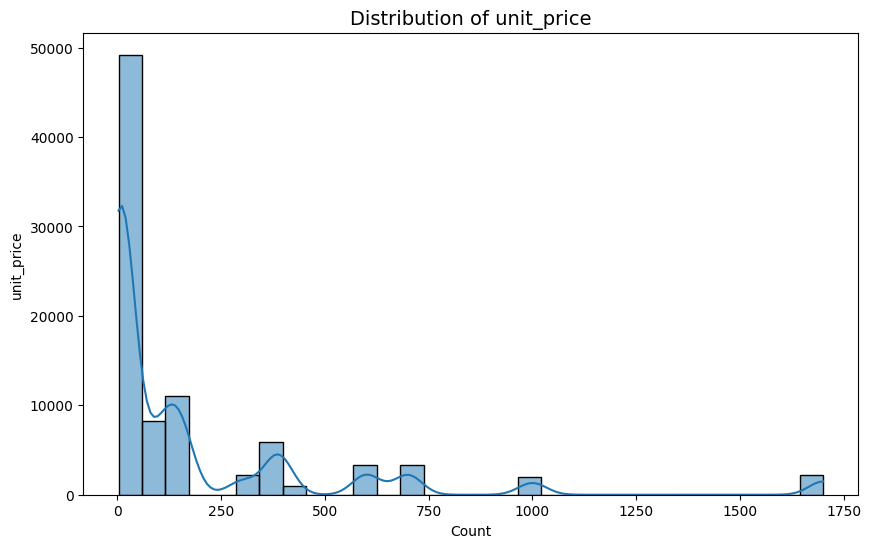

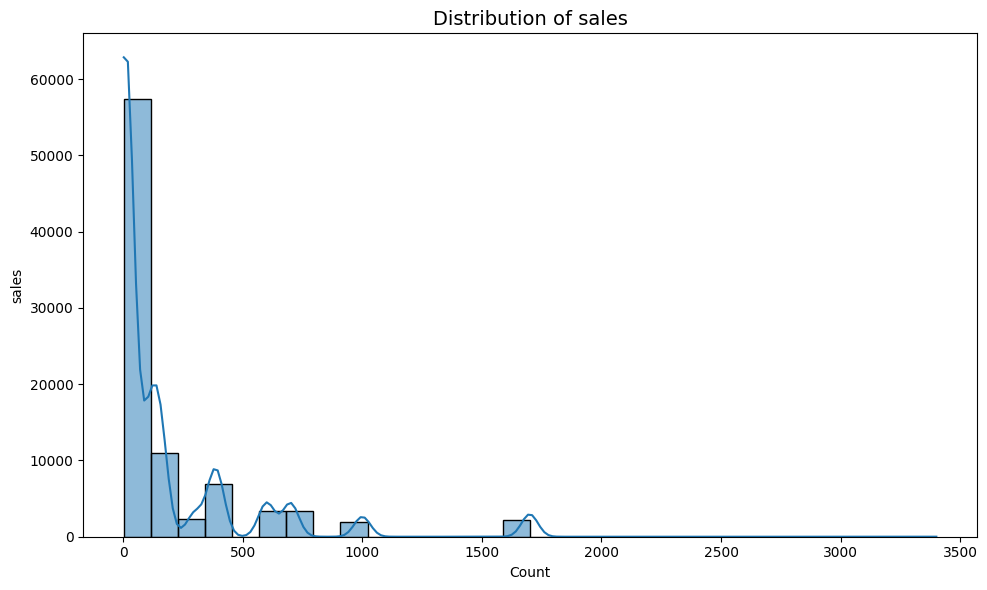

In [49]:
num_var = df1[['quantity_ordered','unit_price','sales']]

#user a for loop to iterate over the columns
for idx, col in enumerate(num_var):
    #set the size
    plt.figure(figsize=(10, 6))
    sns.histplot(df1[col].dropna(), bins=30, kde=True)
    #add titile to the graph
    plt.title(f'Distribution of {col}', fontsize=14)
    #add x and y labels
    plt.xlabel('Count')
    plt.ylabel(col)
    
plt.tight_layout()
#display the plot
plt.show()

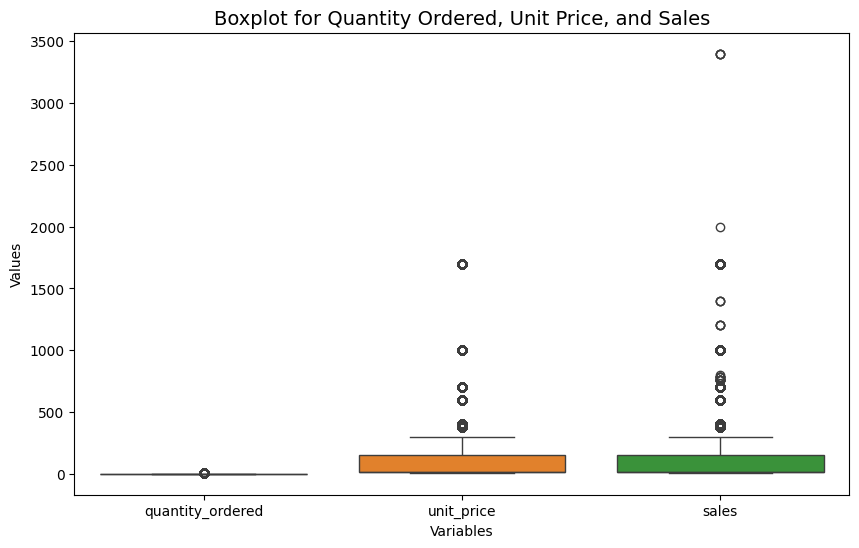

In [50]:

#plot a boxplot to check for outliers

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a boxplot for all numerical variables on the same plot
sns.boxplot(data=num_var, orient='v')  # 'v' for vertical, 'h' for horizontal

# Add title and labels
plt.title('Boxplot for Quantity Ordered, Unit Price, and Sales', fontsize=14)
plt.xlabel('Variables')
plt.ylabel('Values')

# Display the plot
plt.show()



# # Use a for loop to iterate over the columns
# for idx, col in enumerate(num_var):
#     # Set the size of each plot
#     plt.figure(figsize=(10, 6))
    
#     # Create a boxplot for outliers detection
#     sns.boxplot(x=df1[col], orient ='h')
    
#     # Add title to the graph
#     plt.title(f'Boxplot for {col}', fontsize=14)
    
#     # Add x and y labels
#     plt.xlabel(col)
#     plt.ylabel('Values')
    
#     # Display the plot
#     plt.show()

- **Categorical Variable**

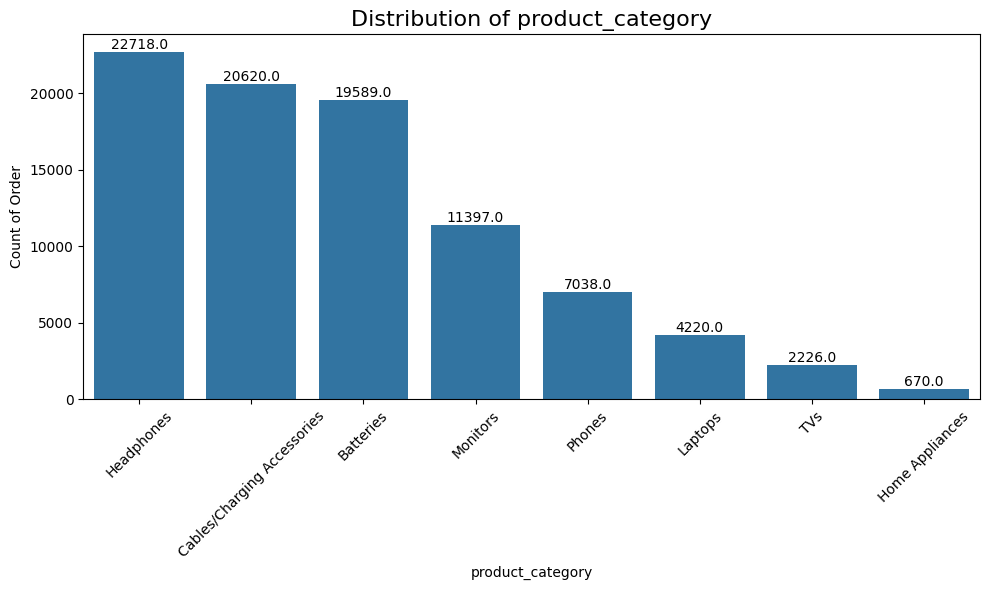

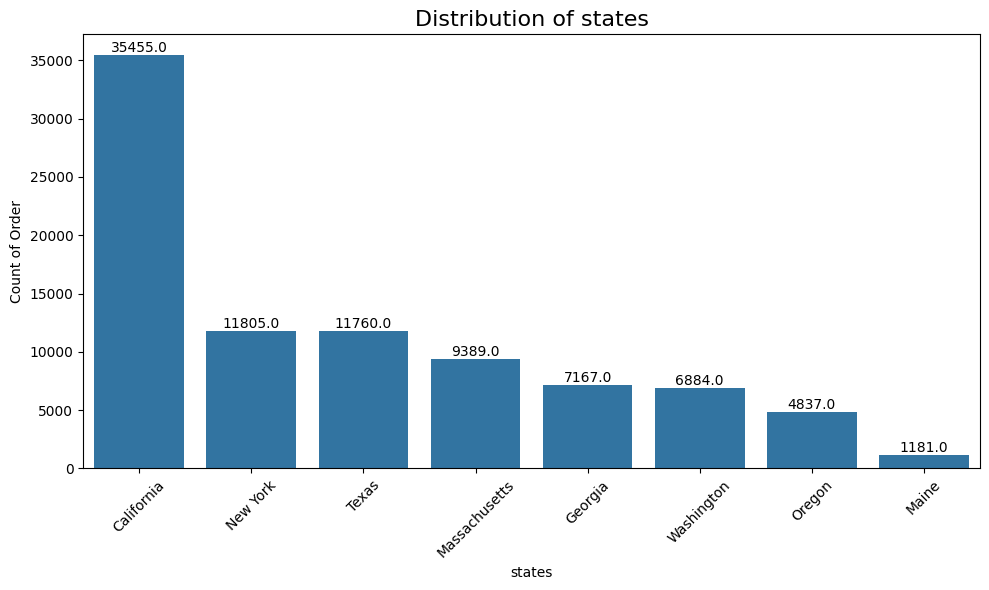

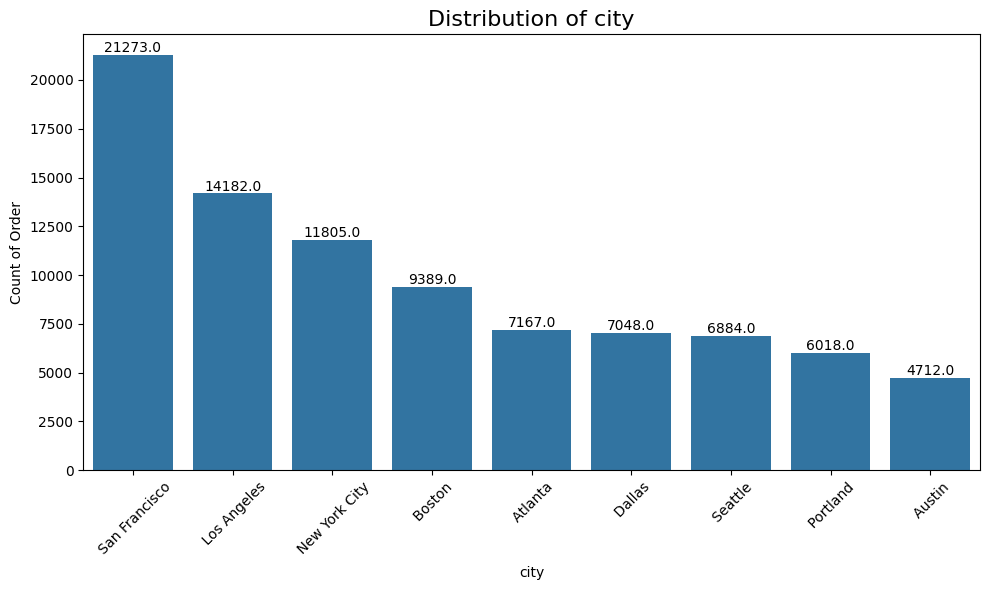

In [51]:

cat_var = df1[['product_category','states','city']]

#  Plot individual horizontal bar charts for each categorical variable, excluding nulls
for col in cat_var.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=cat_var[col], order=cat_var[col].value_counts().index)
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.ylabel('Count of Order')
    plt.xlabel(col)
    plt.xticks(rotation = 45)
    
    # Add count labels on the bars
    ax = plt.gca()
    for p in ax.patches:
        count = p.get_height()
        ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                    xytext=(0, 5), textcoords='offset points', ha='center', va='center')

    plt.tight_layout()
    plt.show()

###### Bivariate Analysis

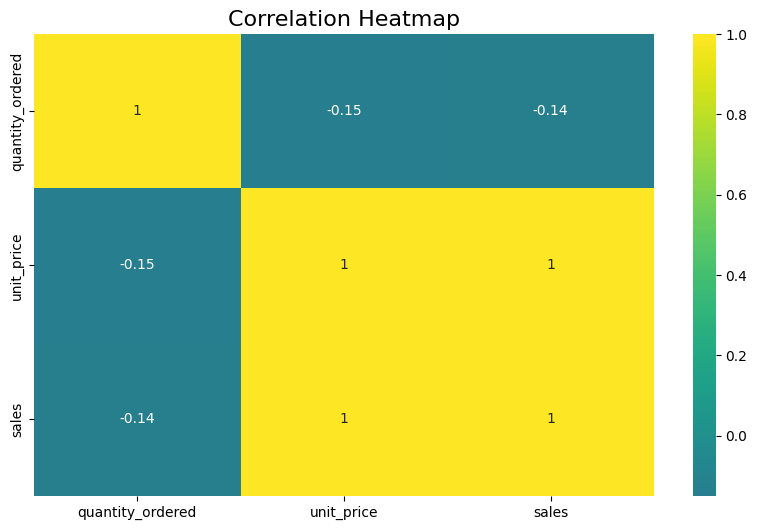

In [52]:
# List of numerical columns to analyze
num_cols = ['quantity_ordered', 'unit_price', 'sales']
# Calculate the correlation matrix
corr_matrix = df1[num_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', center=0)

# Add title
plt.title('Correlation Heatmap', fontsize=16)

# Display the plot
plt.show()


**Key Observations:**

The correlation is 1, showing a perfect positive correlation. This makes sense as sales could be calculated from unit_price, meaning sales directly depend on the unit_price. The formula for sales may be driving this perfect correlation.

- Both quantity_ordered has weak negative correlations with unit_price and sales, suggesting that increasing prices or quantities ordered don't have significant relationships with overall sales.
- The perfect correlation between unit_price and sales suggests that sales are either directly derived from or highly dependent on the unit price (e.g., sales = unit_price × quantity_ordered).The formula for sales may be driving this perfect correlation.
This heatmap helps identify which variables are closely related and may influence each other, guiding further analysis and decision-making.

-**Order by Product and Product_Category**

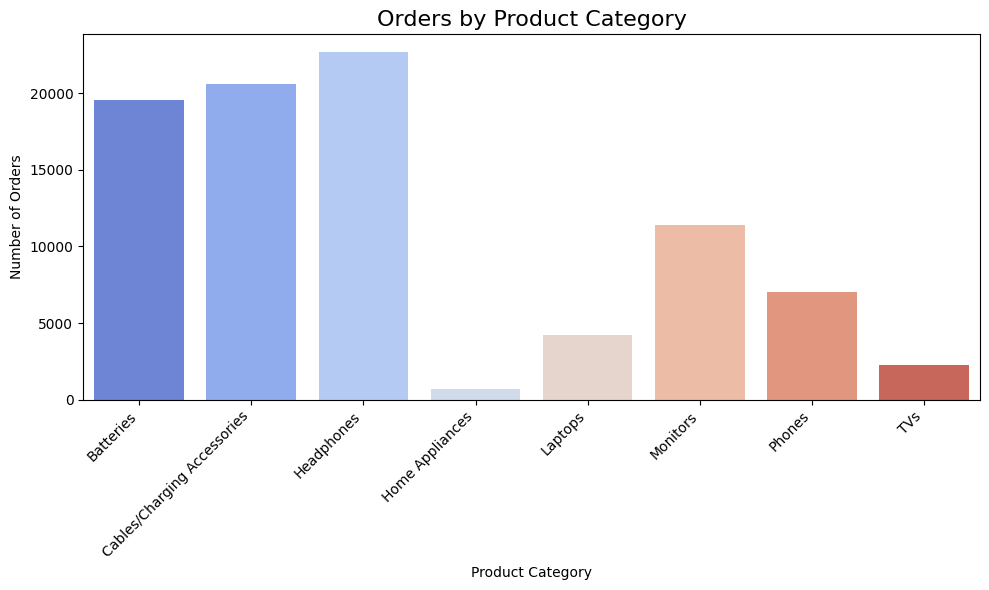

In [53]:
# Group by Product_Category to get the order count
# category_order_counts = df1.groupby('product_category').size().reset_index(name='Order_Count')
category_order_counts = df1.groupby('product_category')['order_id'].count().reset_index(name='Order_Count')
category_order_counts.sort_values(by='Order_Count', ascending =False)
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a barplot for Orders by Product_Category
sns.barplot(x='product_category', y='Order_Count', data=category_order_counts, palette ='coolwarm')

# Add title and labels
plt.title('Orders by Product Category', fontsize=16)
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

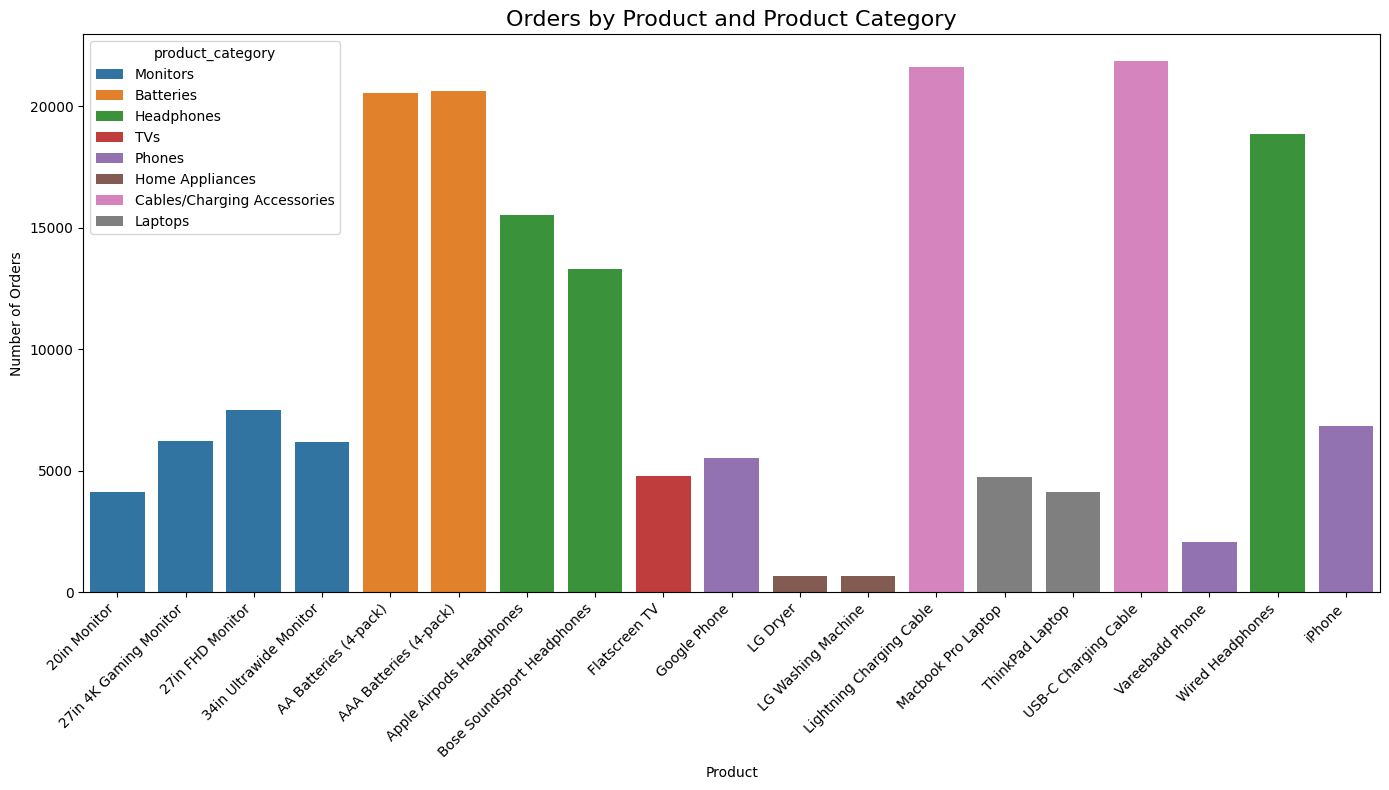

In [54]:
# Group by Product and Product_Category to get the order count
order_counts = df.groupby(['product', 'product_category']).size().reset_index(name='Order_Count')

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a barplot for Orders by Product and Product_Category
sns.barplot(x='product', y='Order_Count', hue='product_category', data=order_counts)

# Add title and labels
plt.title('Orders by Product and Product Category', fontsize=16)
plt.xlabel('Product')
plt.ylabel('Number of Orders')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

- **Order by State**

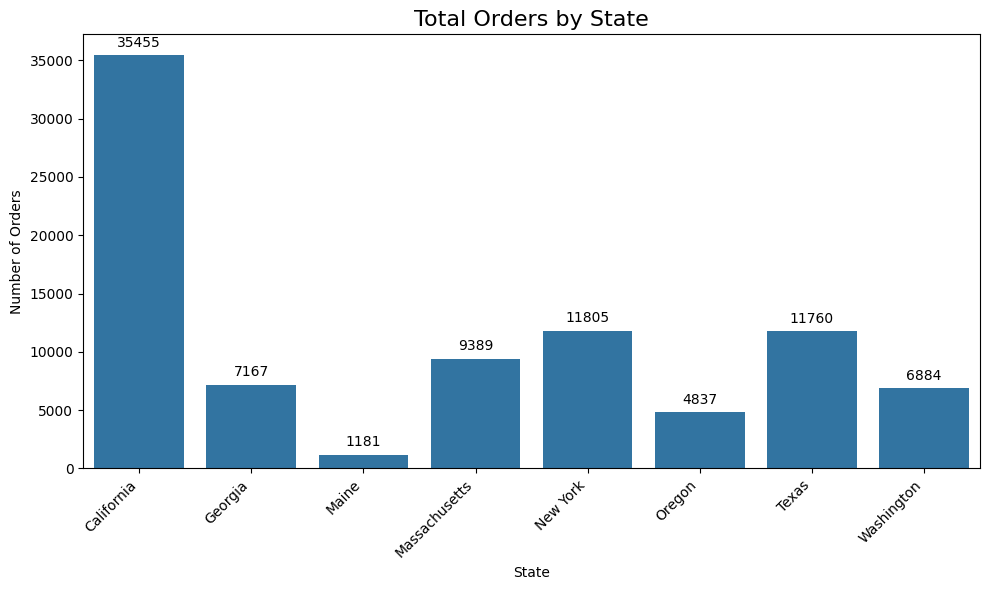

In [55]:

# Group by 'state' to get the count of orders for each state
state_order_counts = df1.groupby('states')['order_id'].count().reset_index(name='Order_Count')

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for Orders by State
bar_plot = sns.barplot(x='states', y='Order_Count', data=state_order_counts)

# Add title and labels
plt.title('Total Orders by State', fontsize=16)
plt.xlabel('State')
plt.ylabel('Number of Orders')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add annotations on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),  # Format as an integer
                      (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the text in the center
                      ha='center', va='center', xytext=(0, 9),  # Offset the text slightly above the bar
                      textcoords='offset points', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


- **Order by City**

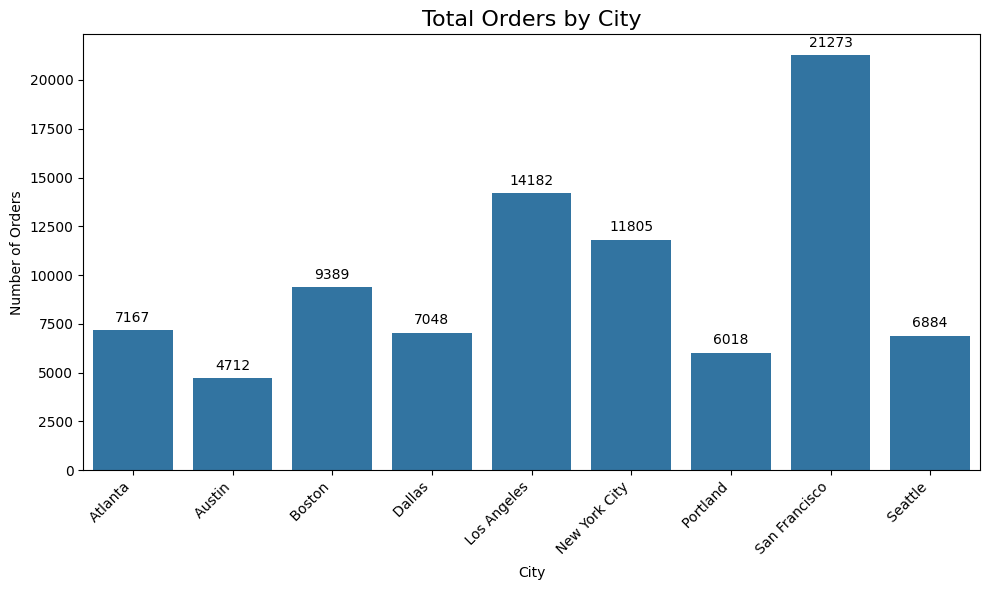

In [56]:

# Group by 'city' to get the count of orders for each city
city_order_counts = df1.groupby('city')['order_id'].count().reset_index(name='Order_Count')

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for Orders by State
bar_plot = sns.barplot(x='city', y='Order_Count', data=city_order_counts)

# Add title and labels
plt.title('Total Orders by City', fontsize=16)
plt.xlabel('City')
plt.ylabel('Number of Orders')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add annotations on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),  # Format as an integer
                      (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the text in the center
                      ha='center', va='center', xytext=(0, 9),  # Offset the text slightly above the bar
                      textcoords='offset points', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


- **Sales by Product Category**

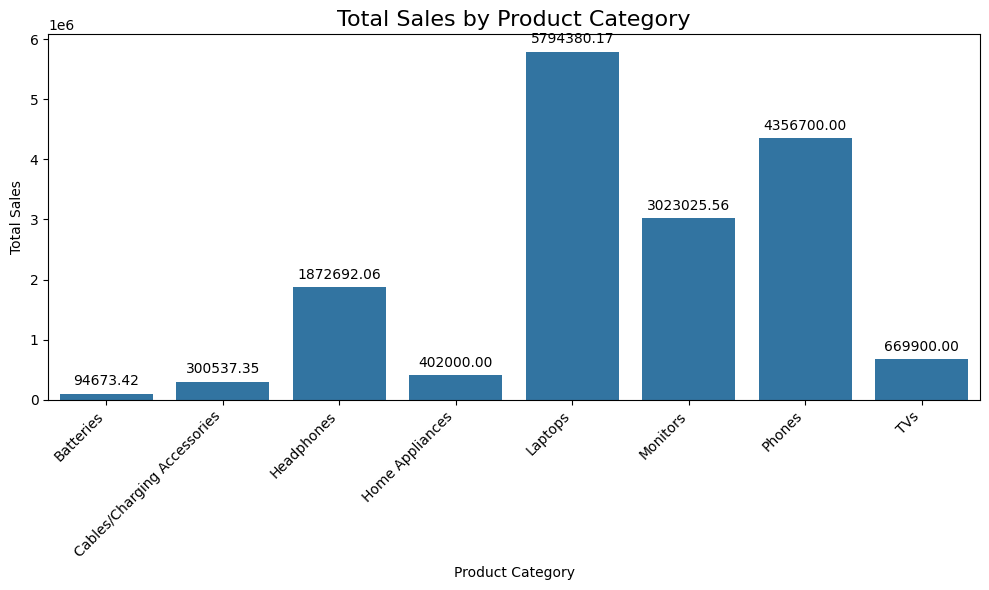

In [57]:

# Group by Product_Category to get the total sales for each category
category_sales = df1.groupby('product_category')['sales'].sum().reset_index()

# Sort the data by sales in descending order
category_sales.sort_values(by='sales', ascending=False)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a barplot for Sales by Product_Category
bar_plot = sns.barplot(x='product_category', y='sales', data=category_sales)

# Add title and labels
plt.title('Total Sales by Product Category', fontsize=16)
plt.xlabel('Product Category')
plt.ylabel('Total Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add annotations on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),  # Format number with 2 decimal places
                      (p.get_x() + p.get_width() / 2., p.get_height()),  # x and y position of text
                      ha='center', va='center', xytext=(0, 9),  # Offset the text slightly above the bar
                      textcoords='offset points', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


##### Multivariate Analysis

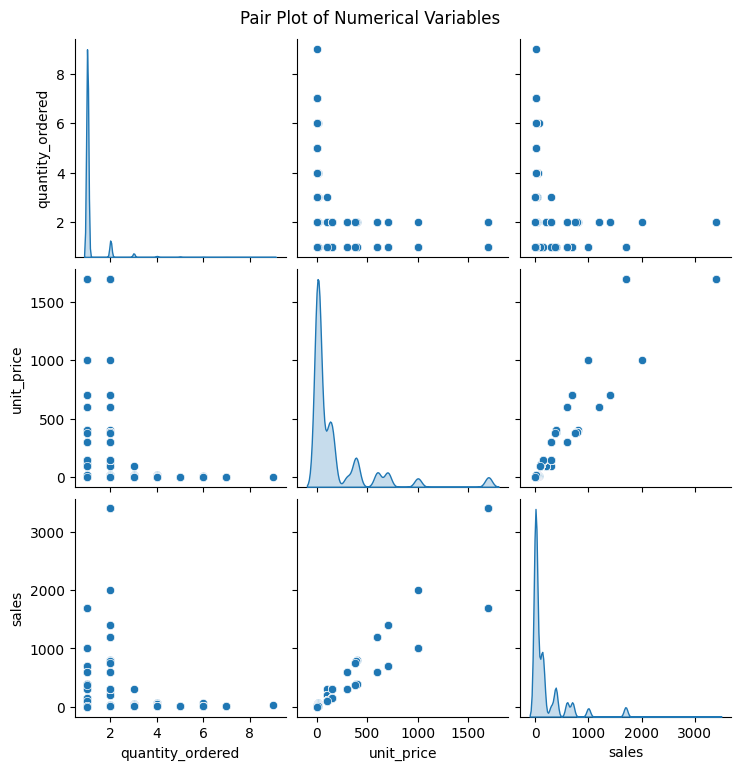

In [66]:

# List of numerical columns for pairplot
num_vars = ['quantity_ordered', 'unit_price', 'sales']

# Create pairplot
sns.pairplot(df1[num_vars], palette ='viridis', diag_kind='kde')

# Add title and show the plot
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


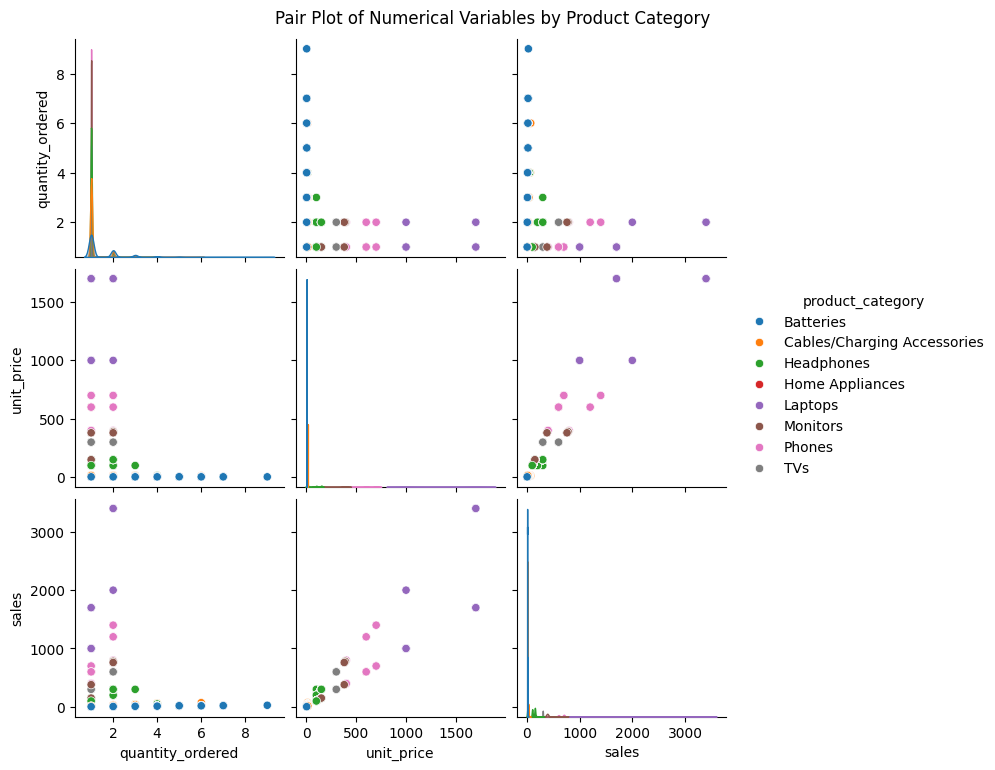

In [59]:
# Adding product_category as a hue in the pairplot
sns.pairplot(df1, hue='product_category', vars=num_vars, diag_kind='kde', height=2.5)

plt.suptitle('Pair Plot of Numerical Variables by Product Category', y=1.02)
plt.show()


##### Answering Analytical Questions


- How much revenue did we generate in 2019:This will help set a baseline for evaluating overall financial performance.

- Can we identify seasonality or trends in sales:To determine peak sales periods and identify patterns that could inform inventory and marketing strategies.

- Which products were our best and worst-sellers:Insights into product performance for improved inventory management and marketing focus.

- How do sales compare across months or weeks:To track sales performance trends across different time periods and understand fluctuations.

- Which cities receive the most deliveries:To inform geographic demand, logistics optimization, and potential market expansion strategies.

- How do product categories compare in terms of revenue and quantities sold:To assess which product categories contribute the most to revenue and where there might be room for growth.
